In [1]:
import scanpy as sc
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.preprocessing import normalize

import pySPaRTAN

In [3]:
!python setup.py build_ext
!python setup.py install --user

Compiling cythLeastR/cythLeastR.pyx because it changed.
Compiling cythKronPlus/cythKronPlus.pyx because it changed.
[1/2] Cythonizing cythKronPlus/cythKronPlus.pyx
/Users/sagana/opt/anaconda3/lib/python3.8/site-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /Users/sagana/Library/CloudStorage/OneDrive-UniversityofPittsburgh/SPaRTAN1/pySPaRTAN/cythKronPlus/cythKronPlus.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
[2/2] Cythonizing cythLeastR/cythLeastR.pyx
/Users/sagana/opt/anaconda3/lib/python3.8/site-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /Users/sagana/Library/CloudStorage/OneDrive-UniversityofPittsburgh/SPaRTAN1/pySPaRTAN/cythLeastR/cythLeastR.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
running build_ext
Compiling cythLeastR/cyt

In [2]:
2

2

In [3]:
adata=pySPaRTAN.pbmc("CD8")
adata_training=adata[(adata.obs["training"] == True)]
adata_testing =adata[(adata.obs["training"] == False)]

In [4]:
model_svd= pySPaRTAN.SPaRTAN(lamda=[1e-10, 0.01],
                             alpha=[0,1],
                             solver="SVD"
                             ).fit(adata_training,
                                   Y="normalized")
model_svd.score(adata_testing)

0.6505109841657477

In [29]:
model_kron= pySPaRTAN.SPaRTAN(lamda=0.002,
                              alpha=0.001,
                              solver="Kron"
                              ).fit(adata_training,
                                    Y="normalized")

model_kron.score(adata_testing)

0.7354144219717306

In [6]:
model_kron.alpha

0.5

In [36]:
tf_svd, tf_p_val_svd = model_svd.get_projD(
    adata.obsm["protein"],
    n_trials=1,
    verbose=True
)

100%|██████████| 1/1 [00:00<00:00, 25.98it/s]


In [38]:
tf_p_val_svd

,CREB1,JUN,TEAD1,FOS,RXRA,PBX3,MYC,RARA,PPARG,PAX6,...,SMARCC1,KMT2B,FOXO4,SSRP1,SMAD5,ZNF274,UBTF,ZNF592,TGIF2,GATAD1
AACACACCAATCCTAG,1.0,1.0,1.0,0.5,0.5,1.0,0.5,1.0,0.5,1.0,...,1.0,1.0,0.5,0.5,1.0,1.0,1.0,1.0,1.0,0.5
AACAGGGAGCGAAACC,1.0,1.0,1.0,0.5,0.5,1.0,0.5,1.0,0.5,1.0,...,1.0,1.0,0.5,0.5,1.0,1.0,1.0,1.0,1.0,0.5
AACCAACTCGAGTACT,1.0,1.0,1.0,0.5,0.5,1.0,0.5,1.0,0.5,1.0,...,1.0,1.0,0.5,0.5,1.0,1.0,1.0,1.0,1.0,0.5
AACCATGCAATGCAAA,0.5,1.0,1.0,0.5,0.5,1.0,0.5,1.0,0.5,1.0,...,1.0,1.0,0.5,0.5,1.0,1.0,1.0,1.0,1.0,0.5
AACGGGAGTGAGATAT,0.5,1.0,1.0,0.5,0.5,1.0,0.5,1.0,0.5,1.0,...,1.0,1.0,0.5,0.5,1.0,1.0,1.0,1.0,1.0,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTGTTCAGTAATGCTC,0.5,1.0,1.0,0.5,0.5,1.0,0.5,1.0,0.5,1.0,...,1.0,1.0,0.5,0.5,1.0,1.0,1.0,1.0,1.0,0.5
TTGTTGTGTACCTTCC,1.0,1.0,1.0,0.5,0.5,1.0,0.5,1.0,0.5,1.0,...,1.0,1.0,0.5,0.5,1.0,1.0,1.0,1.0,1.0,0.5
TTGTTTGTCGACCCAG,1.0,1.0,1.0,0.5,0.5,1.0,0.5,1.0,0.5,1.0,...,1.0,1.0,0.5,0.5,1.0,1.0,1.0,1.0,1.0,0.5
TTTAGTCTCGGTGCAC,1.0,1.0,1.0,0.5,0.5,1.0,0.5,1.0,0.5,1.0,...,1.0,1.0,0.5,0.5,1.0,1.0,1.0,1.0,1.0,0.5


In [30]:
tf_kron, tf_p_val_kron = model_kron.get_projD(
    adata.obsm["protein"],
    n_trials=100,
    verbose=True
)

100%|██████████| 100/100 [01:48<00:00,  1.08s/it]


In [34]:
adata.obsm["protein"]

,CD3,CD4,CD8a,CD11b,CD14,CD15,CD16,CD19,CD20,CD25,...,CD86,CD127,CD137,CD197,CD274,CD278,CD335,PD-1,HLA-DR,TIGIT
AACACACCAATCCTAG,0.334800,0.010434,0.498415,0.022671,0.014578,0.111833,0.041223,0.031794,0.045260,0.000000,...,0.028134,0.015070,0.157606,0.000000,0.131456,0.054173,0.070805,0.325912,0.085379,0.510509
AACAGGGAGCGAAACC,0.355786,0.007989,0.701235,0.024885,0.046132,0.118696,0.028148,0.040374,0.106169,0.177405,...,0.027869,0.431214,0.107616,0.050606,0.065988,0.047345,0.134792,0.097446,0.031533,0.100528
AACCAACTCGAGTACT,0.673128,0.006763,0.114339,0.117708,0.081827,0.109838,0.096260,0.106316,0.040054,0.226240,...,0.035994,0.300262,0.067529,0.094818,0.069391,0.253484,0.049377,0.000000,0.096978,0.061936
AACCATGCAATGCAAA,0.287253,0.011766,0.554503,0.020846,0.027943,0.054411,0.000000,0.000000,0.106274,0.042125,...,0.021427,0.163662,0.040200,0.067747,0.041309,0.240821,0.093416,0.354490,0.046879,0.281239
AACGGGAGTGAGATAT,0.289031,0.014512,0.581485,0.140292,0.064983,0.070835,0.147393,0.042189,0.200506,0.095337,...,0.037617,0.254532,0.112455,0.106912,0.000000,0.081842,0.116722,0.079489,0.084201,0.335698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTGTTCAGTAATGCTC,0.314284,0.006091,0.567727,0.022752,0.035068,0.115596,0.086061,0.039319,0.233578,0.154716,...,0.049577,0.255918,0.085453,0.068322,0.107058,0.160846,0.081564,0.266197,0.058013,0.128400
TTGTTGTGTACCTTCC,0.348682,0.010229,0.547276,0.119552,0.029393,0.118632,0.075023,0.133866,0.100465,0.039823,...,0.029385,0.020922,0.038003,0.041797,0.178564,0.112475,0.142127,0.154444,0.036501,0.381333
TTGTTTGTCGACCCAG,0.569694,0.004675,0.091277,0.057696,0.020981,0.119174,0.092153,0.052290,0.115894,0.086988,...,0.000000,0.194589,0.083388,0.065543,0.047967,0.175222,0.034132,0.324235,0.091292,0.042813
TTTAGTCTCGGTGCAC,0.365309,0.006260,0.655726,0.063550,0.025797,0.078891,0.082807,0.098296,0.065146,0.092805,...,0.050813,0.069163,0.179152,0.070688,0.000000,0.319149,0.030670,0.263428,0.047227,0.286718


<AxesSubplot:>

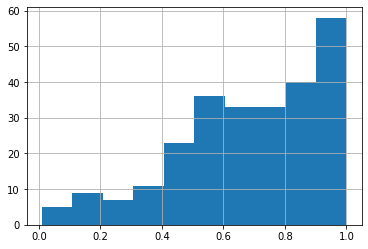

In [11]:
tf_p_val_svd.iloc[1].hist()

<AxesSubplot:>

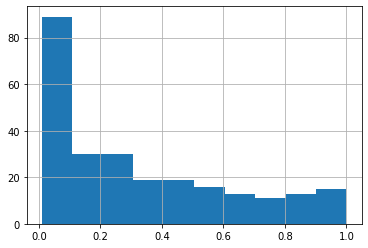

In [12]:
tf_p_val_kron.iloc[1].hist()

In [13]:
prop_sig=(tf_p_val_svd<0.15).mean()
prop_sig.sort_values(ascending=False).head(10)

MAF      1.000000
MYC      1.000000
IRF3     1.000000
RFX5     1.000000
SSRP1    1.000000
ESR2     1.000000
REL      1.000000
ZBED1    0.880878
FOXL2    0.463950
LYL1     0.300940
dtype: float64

In [14]:
(tf_p_val_svd<0.15).mean().sort_values(ascending=False).head(30)

MAF       1.000000
MYC       1.000000
IRF3      1.000000
RFX5      1.000000
SSRP1     1.000000
ESR2      1.000000
REL       1.000000
ZBED1     0.880878
FOXL2     0.463950
LYL1      0.300940
ELK1      0.200627
ELK4      0.188088
PKNOX1    0.000000
MEIS1     0.000000
SNAPC4    0.000000
IKZF1     0.000000
ZBTB33    0.000000
NFE2      0.000000
GRHL2     0.000000
BCL11A    0.000000
RCOR1     0.000000
ZEB1      0.000000
CREB1     0.000000
MNT       0.000000
ZBTB11    0.000000
STAT5B    0.000000
SPIB      0.000000
TAF1      0.000000
ZHX2      0.000000
IRF9      0.000000
dtype: float64

In [28]:
(tf_p_val_kron<0.15).mean()[["MYC","EGR1", "ELK1","SPI1", "SP1", "E2F7", "RFX5", "PPARA", "VDR", "MAFG", "FOXP1", "TCF25", "FOSL2", "USF2", "LEF1", "GATA3", "MEIS2", "SMAD2", "CREB1", "FOS", "TEAD1", "HIF1A", "PPARG"]]

MYC      0.000000
EGR1     0.000000
ELK1     1.000000
SPI1     0.000000
SP1      0.000000
E2F7     0.946708
RFX5     1.000000
PPARA    0.087774
VDR      0.000000
MAFG     1.000000
FOXP1    0.000000
TCF25    1.000000
FOSL2    1.000000
USF2     1.000000
LEF1     0.385580
GATA3    0.874608
MEIS2    0.000000
SMAD2    0.000000
CREB1    1.000000
FOS      0.056426
TEAD1    0.000000
HIF1A    1.000000
PPARG    1.000000
dtype: float64

In [ ]:
type(adata.varm["tf_gene"])

In [ ]:
adata.obsm["tf_activity"]=tf.T
adata.obsm["tf_p_val"]=tf_p_val.T

In [ ]:
protein_tf=adata.get_tf_protein_cor()
protein_tf.head()